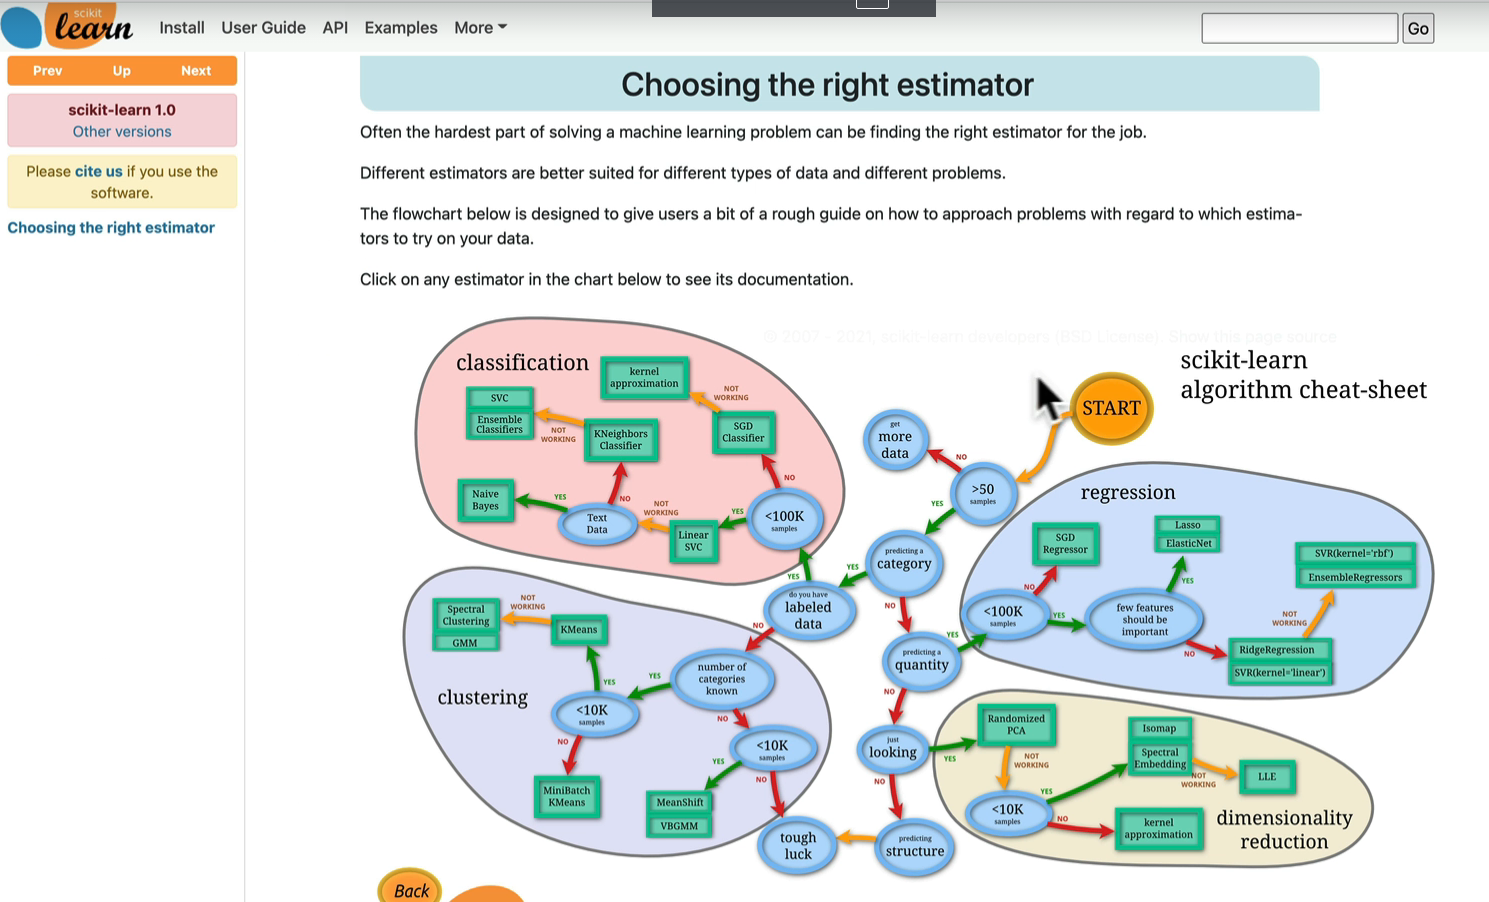

- **Classification problem** = Predicting a category *(heart disease or not)*
- **Regression problem** = Predicting a number *(selling price of a car)*
- **clf** is used as convention for classification estimator
 

In [ ]:
# Using California Housing Dataset from Sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# Convert the housing data dictionary into a dataframe

In [12]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Creating a new column "target" and setting it's value as the target array in the data dictionary, since target is not an explicit feature in the data dictionary

In [13]:
housing_df["target"] = housing["target"]
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Split data into training and testing data


In [14]:
# Setup random seed
np.random.seed(42)  

# Create X and y for the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # this is median house prince in $100,000s

# Split into training and testing data
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


# Instantiate and fit the model (With RidgeRegression model)


In [15]:
# importing algorithm/estimator
from sklearn.linear_model import Ridge
model  = Ridge()
model.fit(X_train, y_train)

# Check the score of the model

model.score(X_test,y_test)

0.5758549611440127

# Instantiate and fit the model (With SVR(kernel="linear") model)


In [16]:
# # importing algorithm/estimator
# from sklearn.svm import SVR
# model  = SVR(kernel="linear")
# model.fit(X_train, y_train)

# # Check the score of the model
# model.score(X_test,y_test)

# Instantiate and fit the model (With SVR(kernel="linear") model)

In [17]:
# # importing algorithm/estimator
# from sklearn.svm import SVR

# # SVR with RBF kernel
# svr_rbf = SVR(kernel="rbf")
# svr_rbf.fit(X_train, y_train)

# # Check the score of the model
# print("SVR RBF Score:", svr_rbf.score(X_test, y_test))

# Instantiate and fit the model (With EnsembleRegressor model)

In [18]:
# importing algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Check the score of the model
print("Random Forest Score:", rf_regressor.score(X_test, y_test))

Random Forest Score: 0.8065734772187598


# Testing out the LinearSVC estimator Classification model 

In [21]:
from sklearn.svm import LinearSVC
import pandas as pd

heart_disease = pd.read_csv("../data/heart-disease.csv")
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y= heart_disease['target']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Initialize the classifier
clf = LinearSVC()
# Fit the classifier
clf.fit(X_train, y_train)

# Test the accuracy of the classifier model
clf.score(X_test,y_test)    

0.8688524590163934

# Testing out the RandomForestClassifier model 

In [23]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y= heart_disease['target']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Initialize the classifier
clf = RandomForestClassifier()
# Fit the classifier
clf.fit(X_train, y_train)

# Test the accuracy of the classifier model
clf.score(X_test,y_test)    

0.8524590163934426

# Note:
    1. If you have structured data (tabular,excel ,csv , json) use emsemble methods 
    2. If you have unstructured data (images,audio , video , text) use deep learning or transfer learning 

## Different names for:
* `X` = features, features variables , data
* `y` = target, target variable, labels
